# Case 2 - Unsupervised Learning
Welcome to the demonstration notebook where we'll go over all of the Unsupervised learning functions in the **pylenm** package!<br>
Let’s get started!


## Setup
Make sure to install pylenm from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [1]:
# pip install pylenm

In [2]:
# Import our packages
import pylenm
from pylenm import PylenmDataFactory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm_df.__version__`

In [3]:
pylenm.__version__

'0.2'

In [4]:
url_1 = 'https://raw.githubusercontent.com/ALTEMIS-DOE/pylenm/master/notebooks/data/FASB_Data_thru_3Q2015_Reduced_Demo.csv'
url_2 = 'https://github.com/ALTEMIS-DOE/pylenm/blob/master/notebooks/data/FASB%20Well%20Construction%20Info.xlsx?raw=true'
concentration_data = pd.read_csv(url_1)
construction_data = pd.read_excel(url_2)

# Create instance
pylenm_df = PylenmDataFactory(concentration_data) # Save concentration data
pylenm_df.simplify_data(inplace=True)
pylenm_df.setConstructionData(construction_data) # Save construction data

Successfully imported the data!

Successfully imported the construction data!



## Functions

 The `getCleanData()` function is a useful preprocessing tool for restructuring the original concentration dataset into a more suitable structure for analysis.
 <br>Let's take a closer look at the function:

In [5]:
# We'll save a list of the analytes we want to look at and pass it to the functions below
# analytes = ['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']
analytes = ['TRITIUM','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']
pylenm_df.getCleanData(analytes)

ANALYTE_NAME    DEPTH_TO_WATER                                               \
STATION_ID             FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8 FOB  1D   
COLLECTION_DATE                                                               
1990-01-01                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-02                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-03                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-06                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-07                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
...                        ...     ...     ...    ...    ...    ...     ...   
2015-09-10                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-21                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-22                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-23                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-24                17.4    15.4   25.16    NaN    NaN    NaN     NaN   

ANALYTE_NAME                             ... URANIUM-238                  \
STATION_ID      FOB  2C FOB  2D FOB 13D  ...     FSP  2B FSP  2C FSP 47A   
COLLECTION_DATE                          ...                               
1990-01-01          NaN     NaN     NaN  ...         NaN     NaN     NaN   
1990-01-02          NaN     NaN     NaN  ...         NaN     NaN     NaN   
1990-01-03          NaN     NaN     NaN  ...         NaN     NaN     NaN   
1990-01-06          NaN     NaN     NaN  ...         NaN     NaN     NaN   
1990-01-07          NaN     NaN     NaN  ...         NaN     NaN     NaN   
...                 ...     ...     ...  ...         ...     ...     ...   
2015-09-10          NaN     NaN     NaN  ...         NaN     NaN     NaN   
2015-09-21          NaN     NaN     NaN  ...         NaN     NaN     NaN   
2015-09-22          NaN     NaN     NaN  ...         NaN     NaN     NaN   
2015-09-23          NaN     NaN     NaN  ...         NaN     NaN     NaN   
2015-09-24          NaN     NaN    21.5  ...         NaN     NaN     NaN   

ANALYTE_NAME                                                               
STATION_ID      FSP-072A FSP-072B FSP-12A FSP204A FSP226A FSP249A FSP249B  
COLLECTION_DATE                                                            
1990-01-01           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-02           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-03           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-06           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-07           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
...                  ...      ...     ...     ...     ...     ...     ...  
2015-09-10           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2015-09-21           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2015-09-22           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2015-09-23           NaN      NaN     NaN     NaN     NaN     NaN     NaN  
2015-09-24           NaN      NaN     NaN     NaN     NaN     NaN     NaN  

[2421 rows x 773 columns]

As you can see above, there are many missing values (NaN), but thats normal since there isn't always a concentration value for each analyte, well and date 3-tuple.

The next function is called `getCommonDates()` and this is used to get insight on how many data points exist for a given range of days.
<br>Lets see an example and a plot to show how much more data can be extracted from the dataset using a lag.

In [6]:
lags = [1,3,7,12]
shared_dates = pylenm_df.getCommonDates(analytes=analytes, lag=lags)
shared_dates

Date Ranges Number of wells
Dates      Lag                                         
1990-01-01 1    1989-12-31 - 1990-01-02              16
           3    1989-12-29 - 1990-01-04              24
           7    1989-12-25 - 1990-01-08              41
           12   1989-12-20 - 1990-01-13              53
1990-01-02 1    1990-01-01 - 1990-01-03              14
...                                 ...             ...
2015-09-23 12   2015-09-11 - 2015-10-05              15
2015-09-24 1    2015-09-23 - 2015-09-25               8
           3    2015-09-21 - 2015-09-27              14
           7    2015-09-17 - 2015-10-01              15
           12   2015-09-12 - 2015-10-06              15

[9684 rows x 2 columns]

Let's create a plot to examine the differences in number of well data available as we increase the lag.

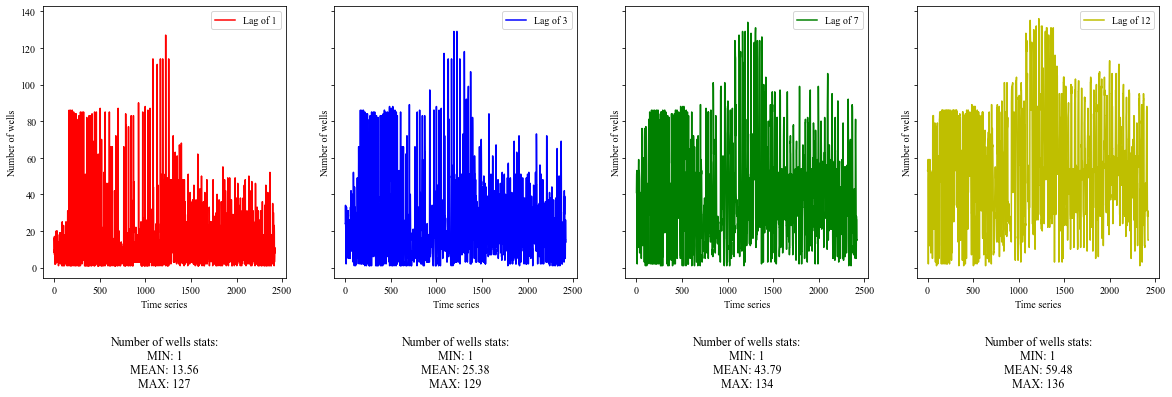

In [7]:
colors = ['r', 'b', 'g', 'y']

fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(20,5), sharex=True, sharey=True)
for i, ax in enumerate(axs):
    data = np.array(shared_dates[shared_dates.index.get_level_values('Lag')==lags[i]]['Number of wells'])
    axs[i].plot(data, color=colors[i], label='Lag of '+str(lags[i]))
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel('Time series')
    axs[i].set_ylabel('Number of wells')
    stats_text = str('Number of wells stats:\nMIN: {}\nMEAN: {}\nMAX: {}'.format(data.min(), round(data.mean(), 2), data.max()))
    axs[i].text(0.5,-0.4, stats_text, size=12, ha="center", transform=axs[i].transAxes)

As we can see, the average number of wells increases significantly as we increase the lag.
<br> With this insight, we can make a determination as to which lag is most suitable for our data. For the purpose of this demonstration we will continue the rest of the examples with a lag of 12.
<br><br> `getJointData()` takes `getCleanData()` one step further and saves the data according to the specified lag. You’ll notice that the index is no long a single date but a range of dates. The new range is (date - lag) through (date + lag).

In [8]:
lag = 12
jointData = pylenm_df.getJointData(analytes, lag=lag)
jointData

GENERATING DATA WITH A LAG OF 12.
Progress:
1%, 2%, 3%, 4%, 5%, 6%, 7%, 8%, 9%, 10%, 11%, 12%, 13%, 14%, 15%, 16%, 17%, 18%, 19%, 20%, 21%, 22%, 23%, 24%, 25%, 26%, 27%, 28%, 29%, 30%, 31%, 32%, 33%, 34%, 35%, 36%, 37%, 38%, 39%, 40%, 41%, 42%, 43%, 44%, 45%, 46%, 47%, 48%, 49%, 50%, 51%, 52%, 53%, 54%, 55%, 56%, 57%, 58%, 59%, 60%, 61%, 62%, 63%, 64%, 65%, 66%, 67%, 68%, 69%, 70%, 71%, 72%, 73%, 74%, 75%, 76%, 77%, 78%, 79%, 80%, 81%, 82%, 83%, 84%, 85%, 86%, 87%, 88%, 89%, 90%, 91%, 92%, 93%, 94%, 95%, 96%, 97%, 98%, 99%, Completed


ANALYTE_NAME            DEPTH_TO_WATER                                       \
STATION_ID                     FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8   
1989-12-20 - 1990-01-13            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-21 - 1990-01-14            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-22 - 1990-01-15            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-25 - 1990-01-18            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-26 - 1990-01-19            NaN     NaN     NaN    NaN    NaN    NaN   
...                                ...     ...     ...    ...    ...    ...   
2015-08-29 - 2015-09-22            NaN     NaN     NaN    NaN    NaN    NaN   
2015-09-09 - 2015-10-03           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-10 - 2015-10-04           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-11 - 2015-10-05           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-12 - 2015-10-06           17.4    15.4   25.16    NaN    NaN    NaN   

ANALYTE_NAME                                             ... URANIUM-238  \
STATION_ID              FOB  1D FOB  2C FOB  2D FOB 13D  ...     FSP  2B   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN  ...         NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN  ...         NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN  ...         NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN  ...         NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN  ...         NaN   
...                         ...     ...     ...     ...  ...         ...   
2015-08-29 - 2015-09-22     NaN     NaN     NaN     NaN  ...       0.237   
2015-09-09 - 2015-10-03     NaN     NaN     NaN    21.5  ...         NaN   
2015-09-10 - 2015-10-04     NaN     NaN     NaN    21.5  ...         NaN   
2015-09-11 - 2015-10-05     NaN     NaN     NaN    21.5  ...         NaN   
2015-09-12 - 2015-10-06     NaN     NaN     NaN    21.5  ...         NaN   

ANALYTE_NAME                                                               \
STATION_ID              FSP  2C FSP 47A FSP-072A FSP-072B FSP-12A FSP204A   
1989-12-20 - 1990-01-13     NaN     NaN      NaN      NaN     NaN     NaN   
1989-12-21 - 1990-01-14     NaN     NaN      NaN      NaN     NaN     NaN   
1989-12-22 - 1990-01-15     NaN     NaN      NaN      NaN     NaN     NaN   
1989-12-25 - 1990-01-18     NaN     NaN      NaN      NaN     NaN     NaN   
1989-12-26 - 1990-01-19     NaN     NaN      NaN      NaN     NaN     NaN   
...                         ...     ...      ...      ...     ...     ...   
2015-08-29 - 2015-09-22     NaN     NaN    0.104   0.0457    1.02   0.479   
2015-09-09 - 2015-10-03     NaN     NaN      NaN      NaN     NaN     NaN   
2015-09-10 - 2015-10-04     NaN     NaN      NaN      NaN     NaN     NaN   
2015-09-11 - 2015-10-05     NaN     NaN      NaN      NaN     NaN     NaN   
2015-09-12 - 2015-10-06     NaN     NaN      NaN      NaN     NaN     NaN   

ANALYTE_NAME                                     
STATION_ID              FSP226A FSP249A FSP249B  
1989-12-20 - 1990-01-13     NaN     NaN     NaN  
1989-12-21 - 1990-01-14     NaN     NaN     NaN  
1989-12-22 - 1990-01-15     NaN     NaN     NaN  
1989-12-25 - 1990-01-18     NaN     NaN     NaN  
1989-12-26 - 1990-01-19     NaN     NaN     NaN  
...                         ...     ...     ...  
2015-08-29 - 2015-09-22     NaN   0.287   0.169  
2015-09-09 - 2015-10-03     NaN     NaN     NaN  
2015-09-10 - 2015-10-04     NaN     NaN     NaN  
2015-09-11 - 2015-10-05     NaN     NaN     NaN  
2015-09-12 - 2015-10-06     NaN     NaN     NaN  

[2421 rows x 773 columns]

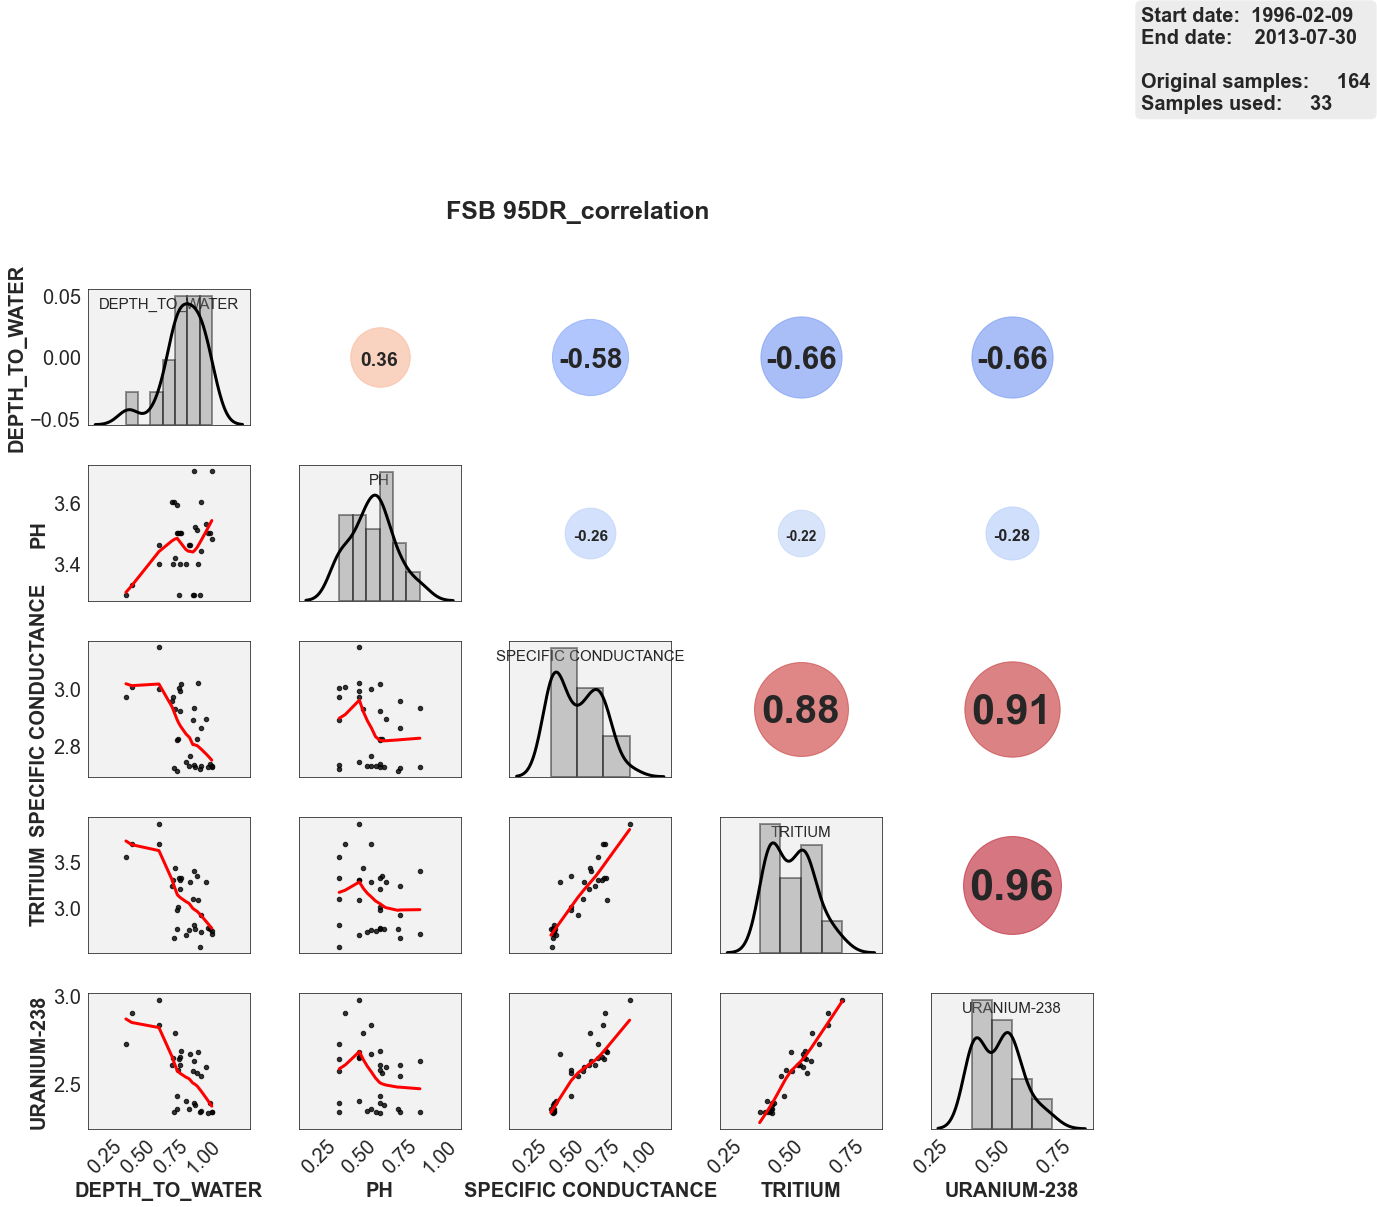

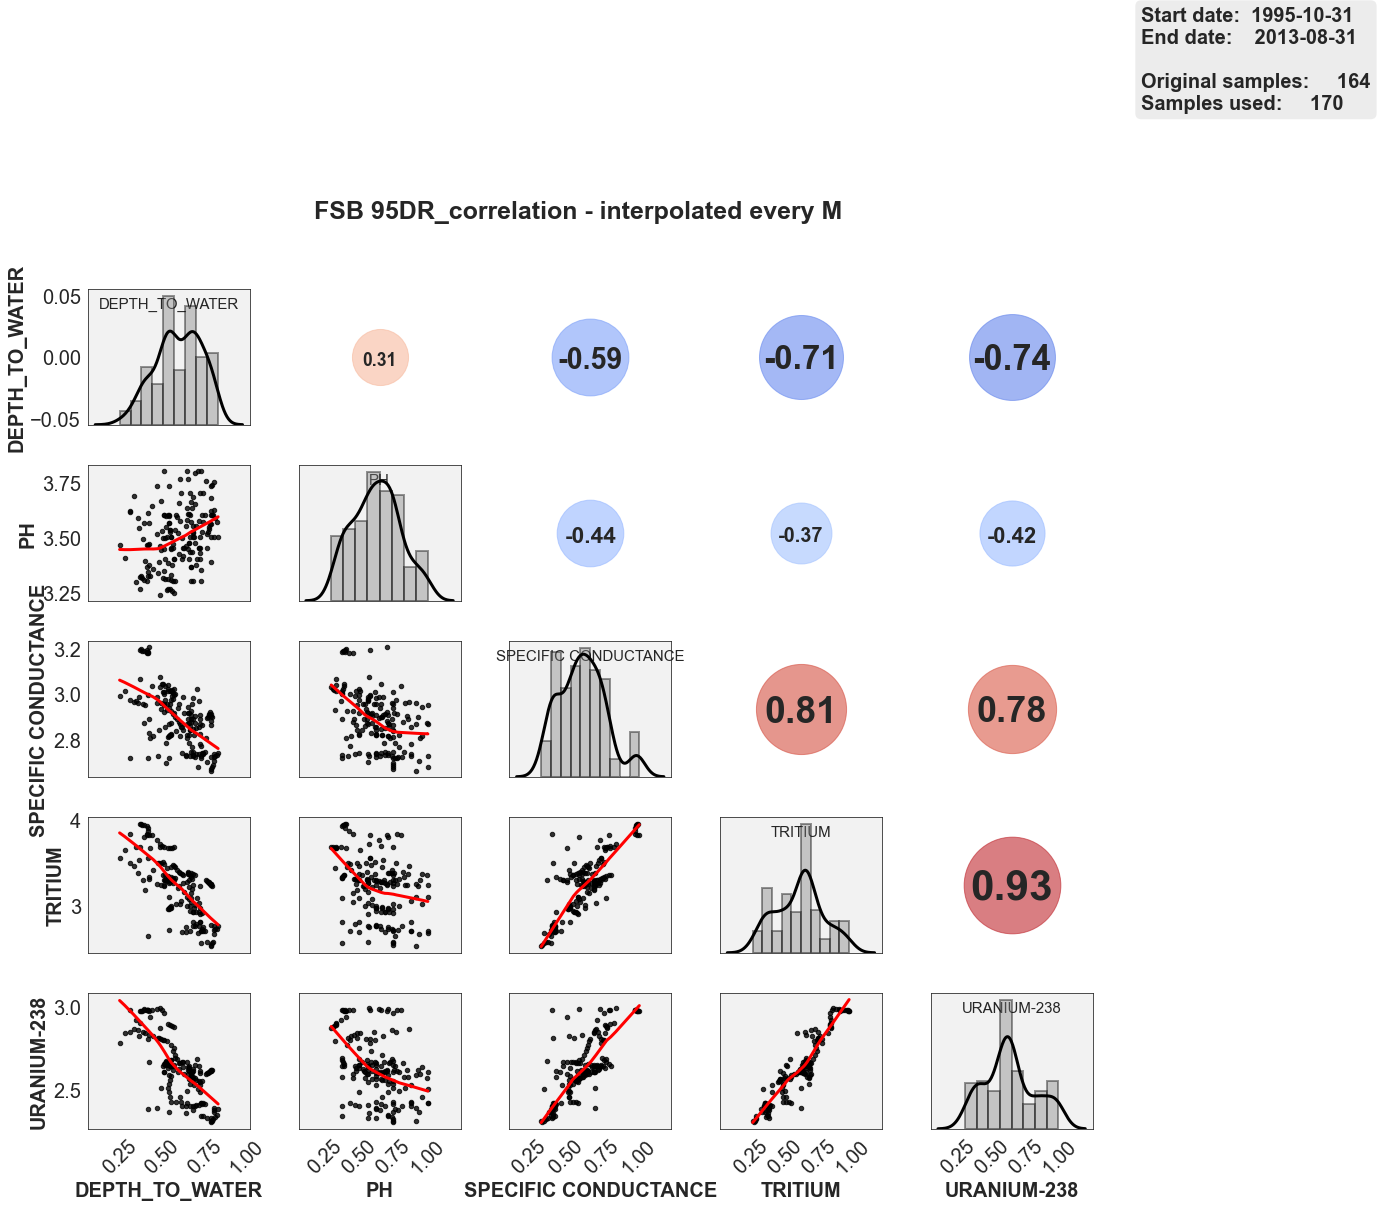

In [9]:
# analytes = ['TRITIUM','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']

pylenm_df.plot_corr_by_well(well_name='FSB 95DR', analytes=analytes, log_transform=True, remove_outliers=True, z_threshold=1.3, remove=['1999-07-28'], no_log=['PH'])


pylenm_df.plot_corr_by_well(well_name='FSB 95DR', analytes=analytes,
                         interpolate=True, frequency='M', 
                         remove_outliers=True, z_threshold=1.3, log_transform=True, remove=['1999-07-28'], no_log=['PH'])

ANALYTE_NAME,DEPTH_TO_WATER,PH,SPECIFIC CONDUCTANCE,TRITIUM,URANIUM-238
STATION_ID,,,,,
FSB 91C,66.76,4.875,314.500000,946.00,1.81
FSB 91D,63.92,3.600,381.000000,1820.00,102.00
FSB 93C,65.75,5.100,374.000000,1510.00,1.00
FSB 94C,71.40,4.370,1955.000000,10200.00,10.30
FSB 94DR,69.11,3.115,2585.000000,25000.00,1190.00
FSB 96AR,127.52,7.315,175.500000,9.06,1.00
FSB 97A,133.39,7.070,266.333333,335.00,1.00
FSB 97C,76.40,3.615,2095.000000,17700.00,622.50
FSB 97D,73.88,3.735,2415.000000,20900.00,559.00


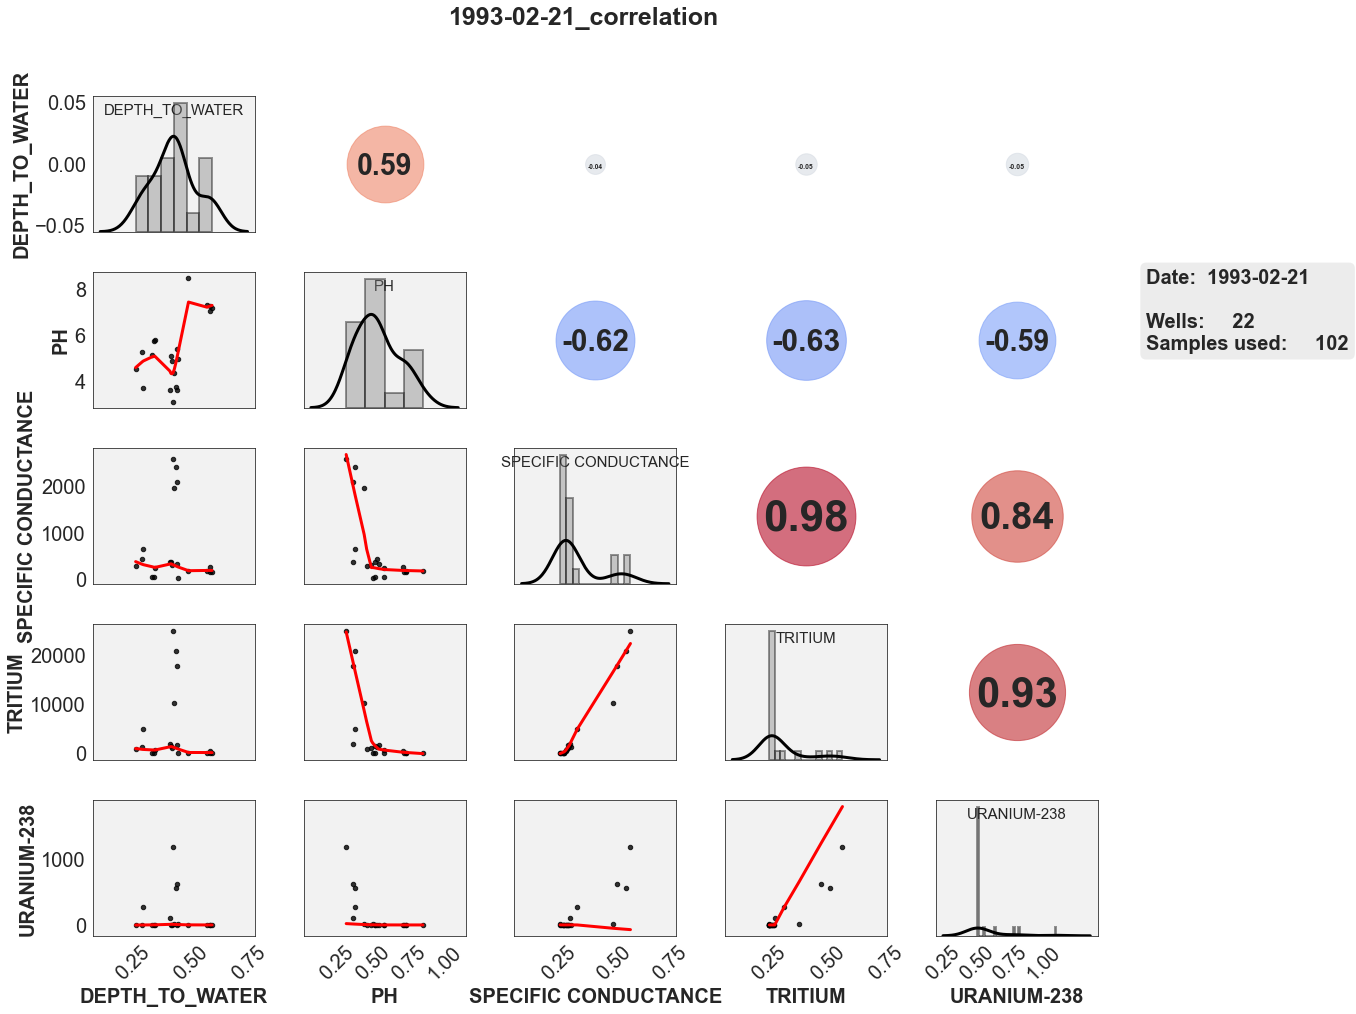

In [10]:
pylenm_df.plot_corr_by_date_range('1993-02-21', analytes=analytes, returnData=True)

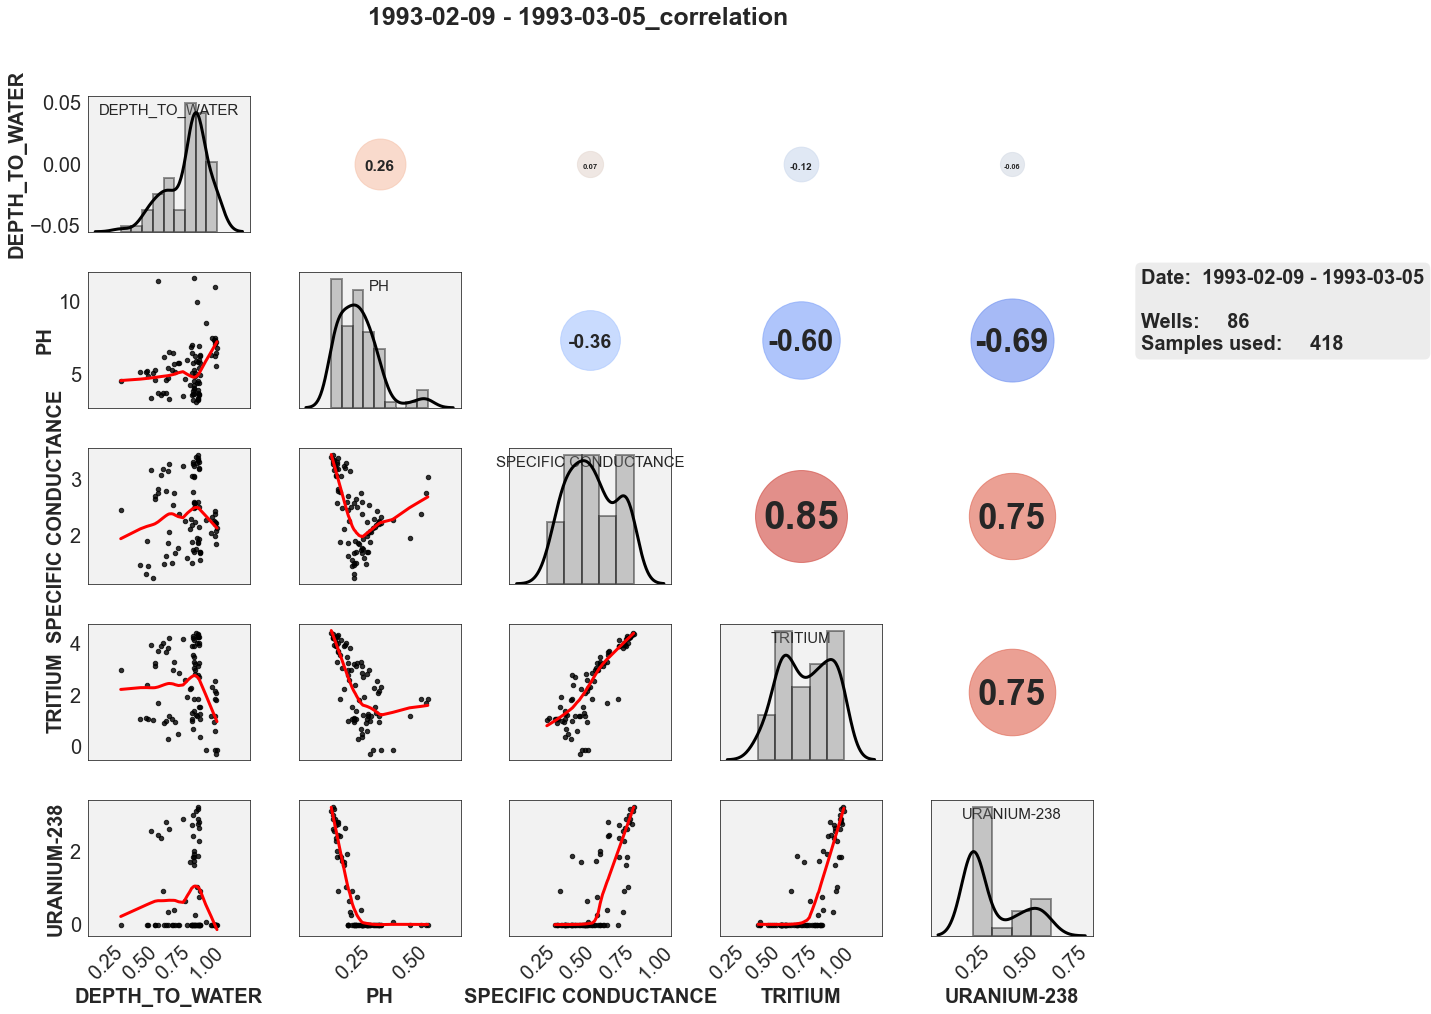

In [11]:
pylenm_df.plot_corr_by_date_range('1993-02-21', lag=lag, analytes=analytes, log_transform=True, no_log=['PH'])

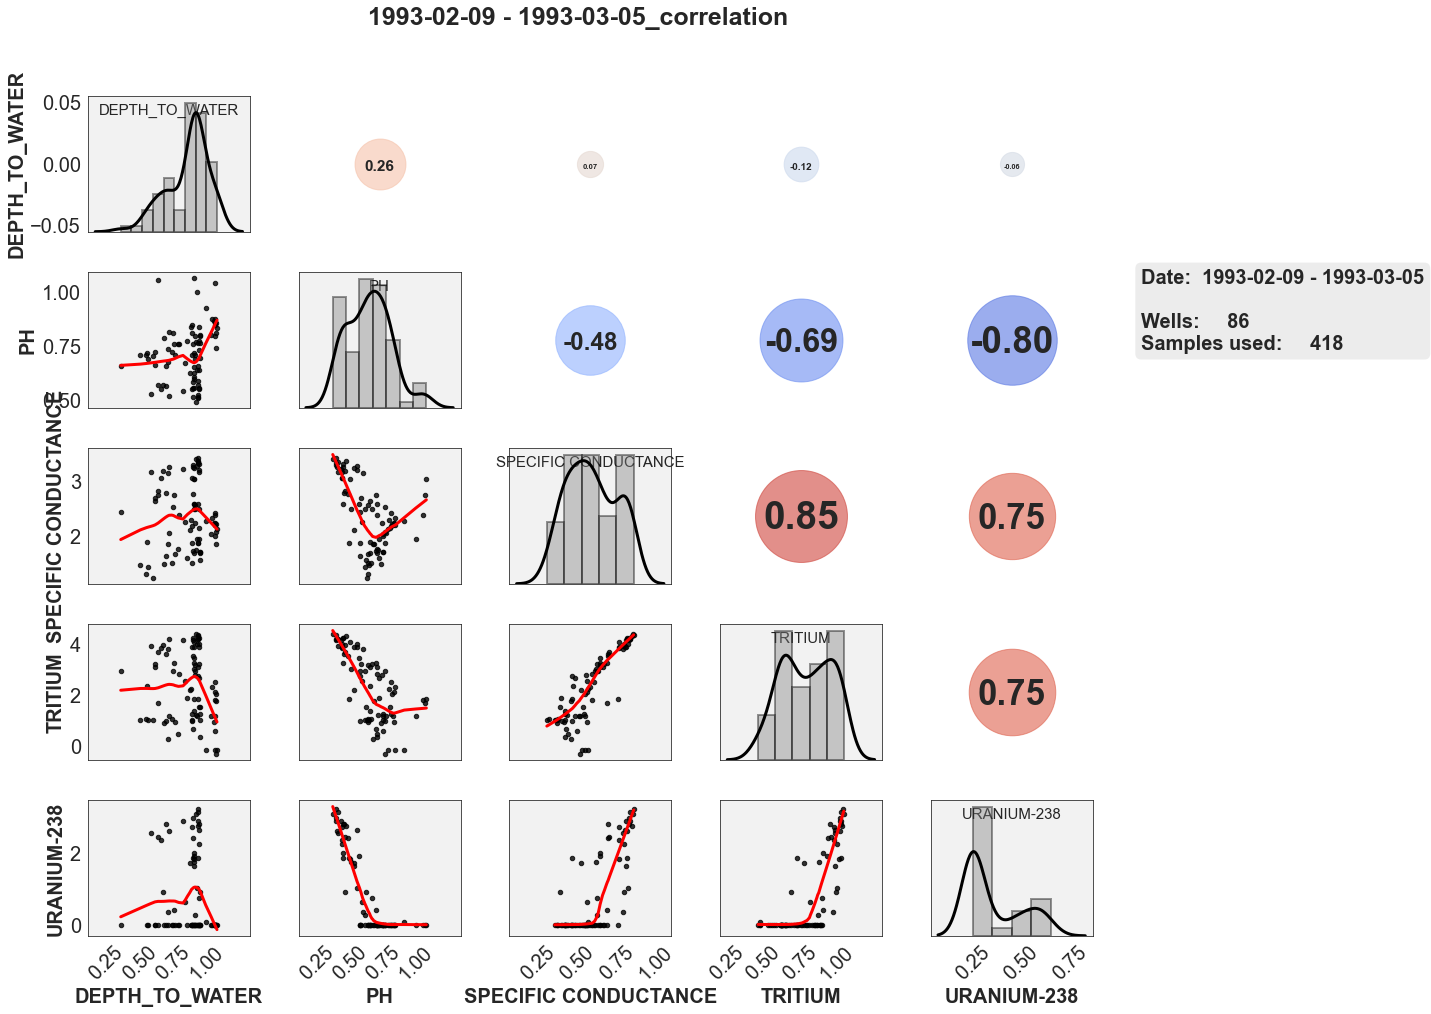

In [12]:
pylenm_df.plot_corr_by_date_range('1993-02-21', lag=lag, analytes=analytes, log_transform=True)

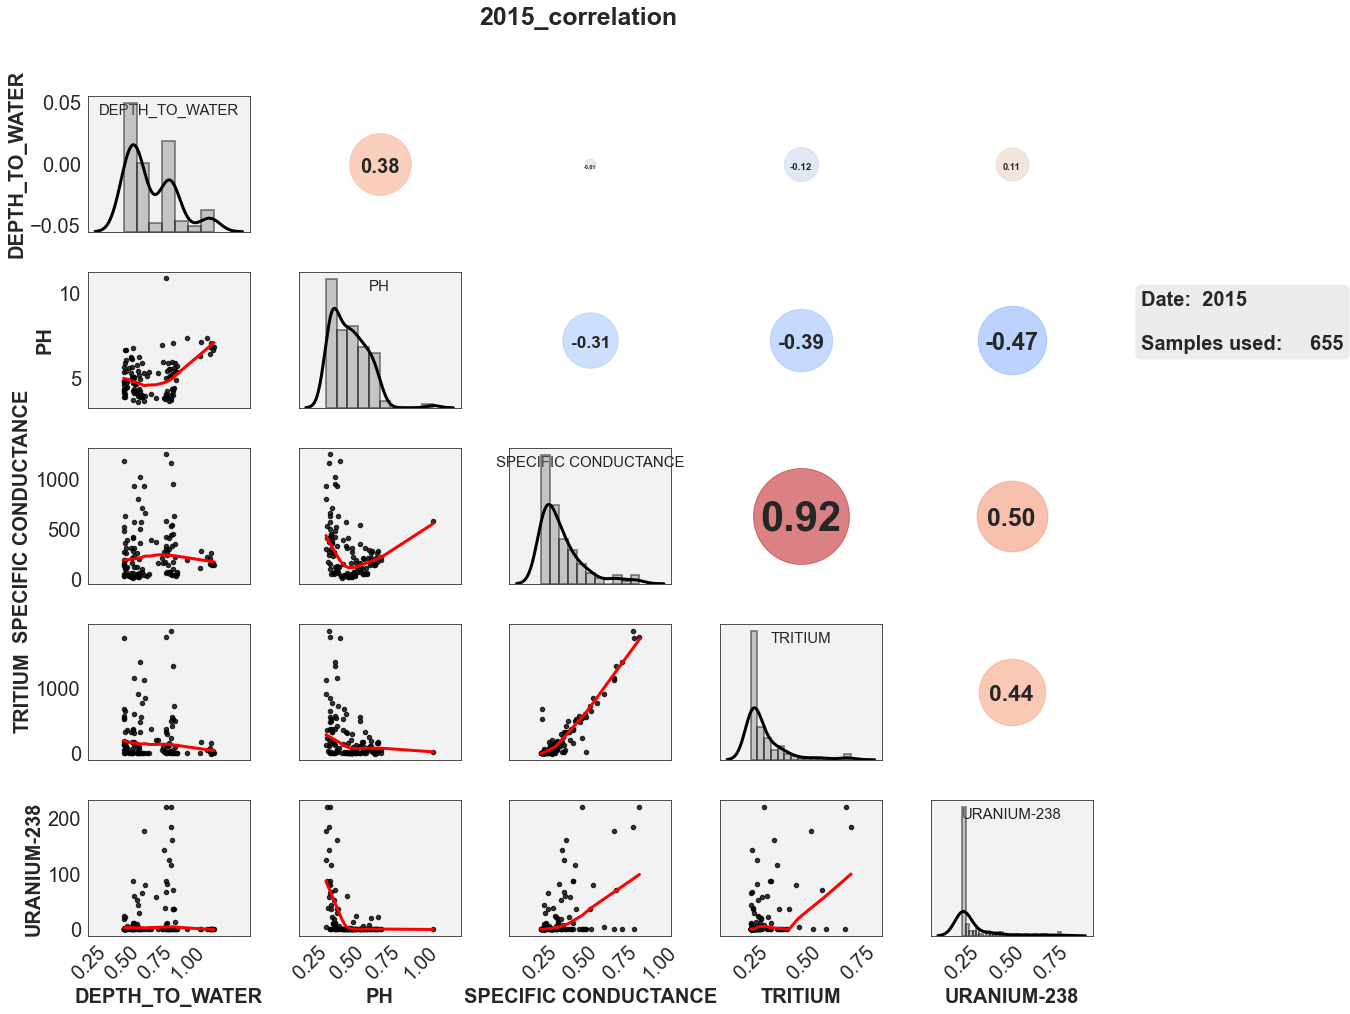

In [13]:
pylenm_df.plot_corr_by_year(2015, analytes=analytes, remove_outliers=True, z_threshold=3, no_log=['PH'])

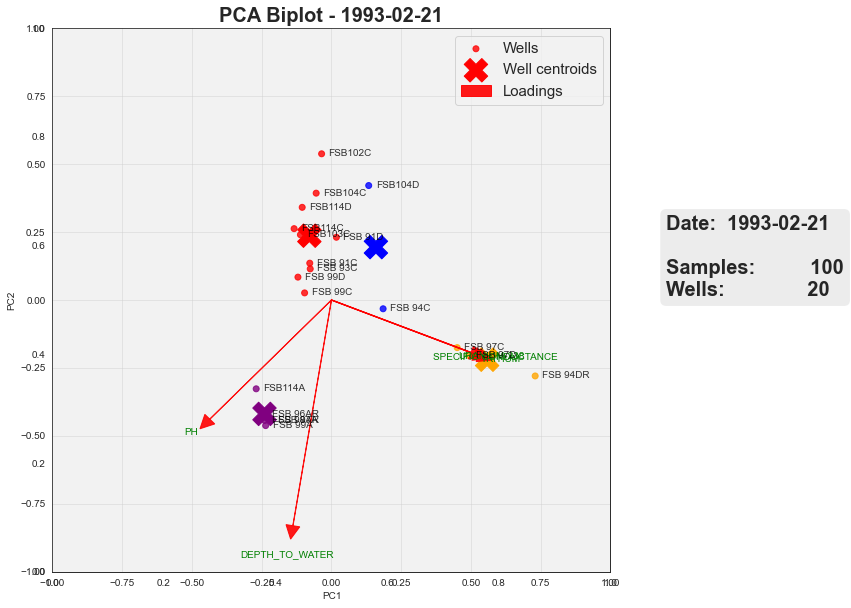

In [14]:
pylenm_df.plot_PCA_by_date('1993-02-21', analytes)

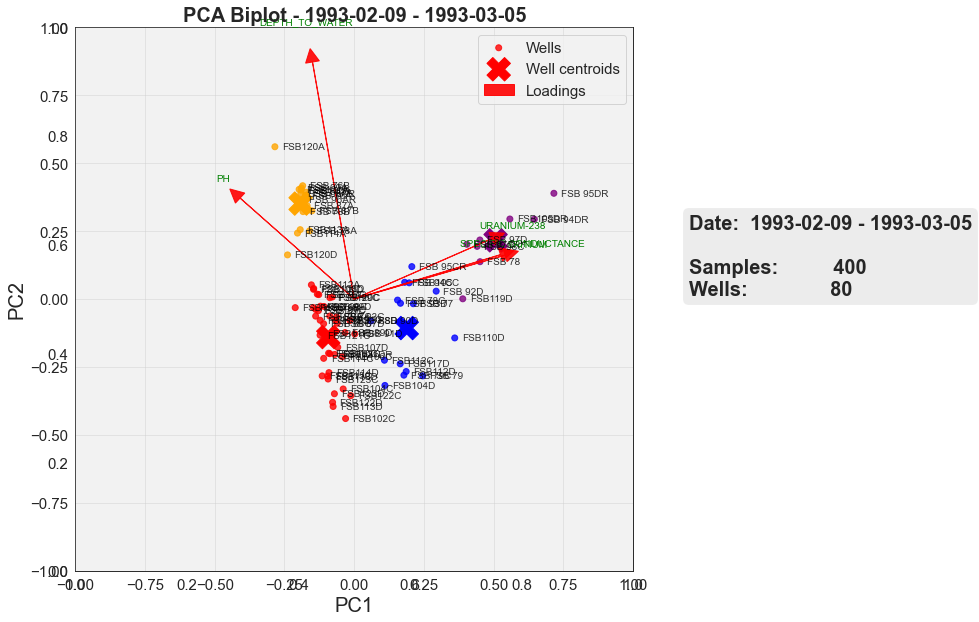

In [15]:
pylenm_df.plot_PCA_by_date('1993-02-21', analytes, lag=lag)

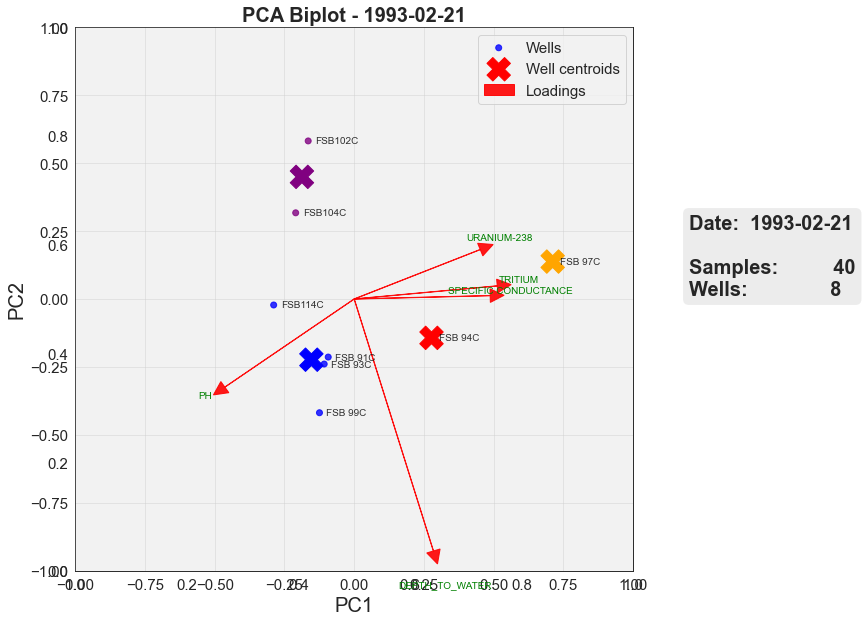

In [16]:
 pylenm_df.plot_PCA_by_date('1993-02-21', analytes, lag=0, filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

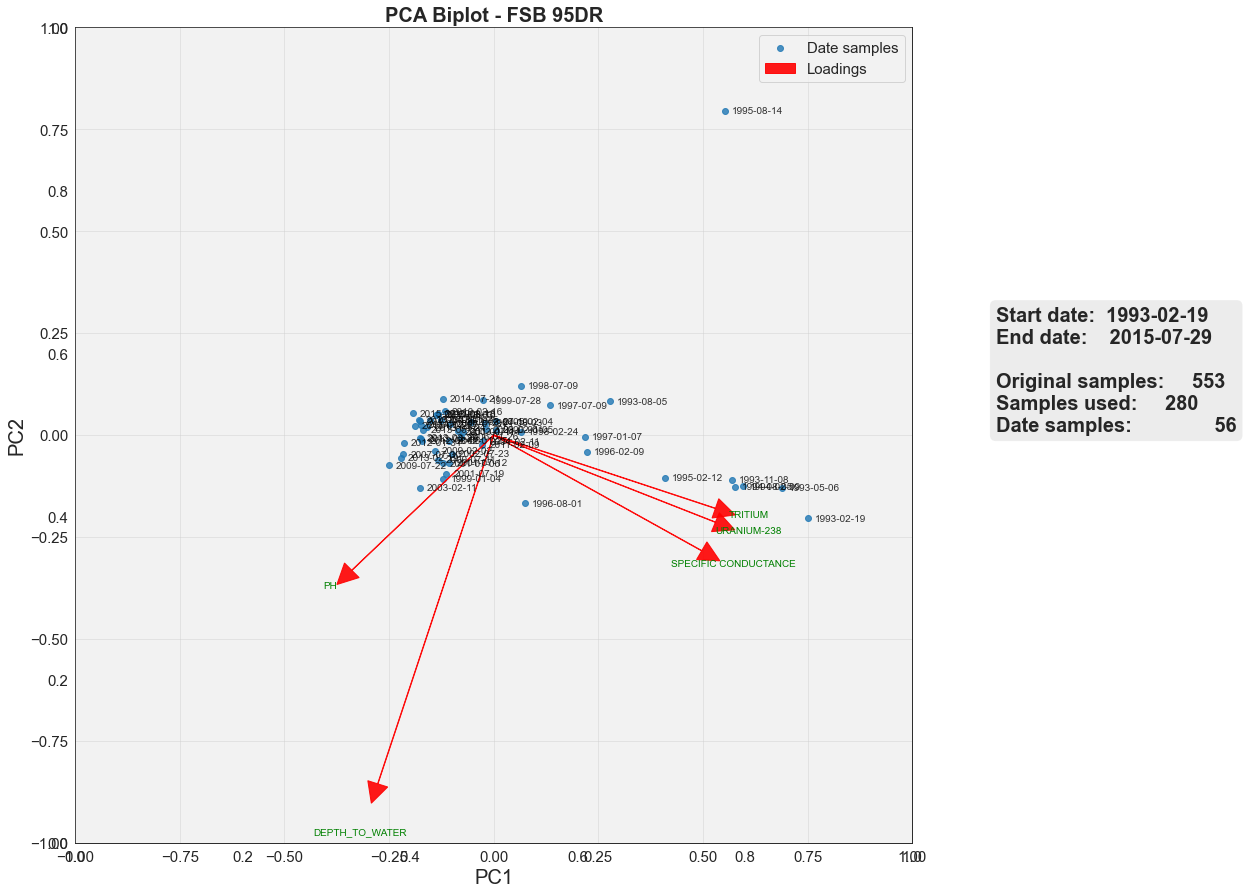

In [17]:
pylenm_df.plot_PCA_by_well(well_name='FSB 95DR', analytes=analytes)

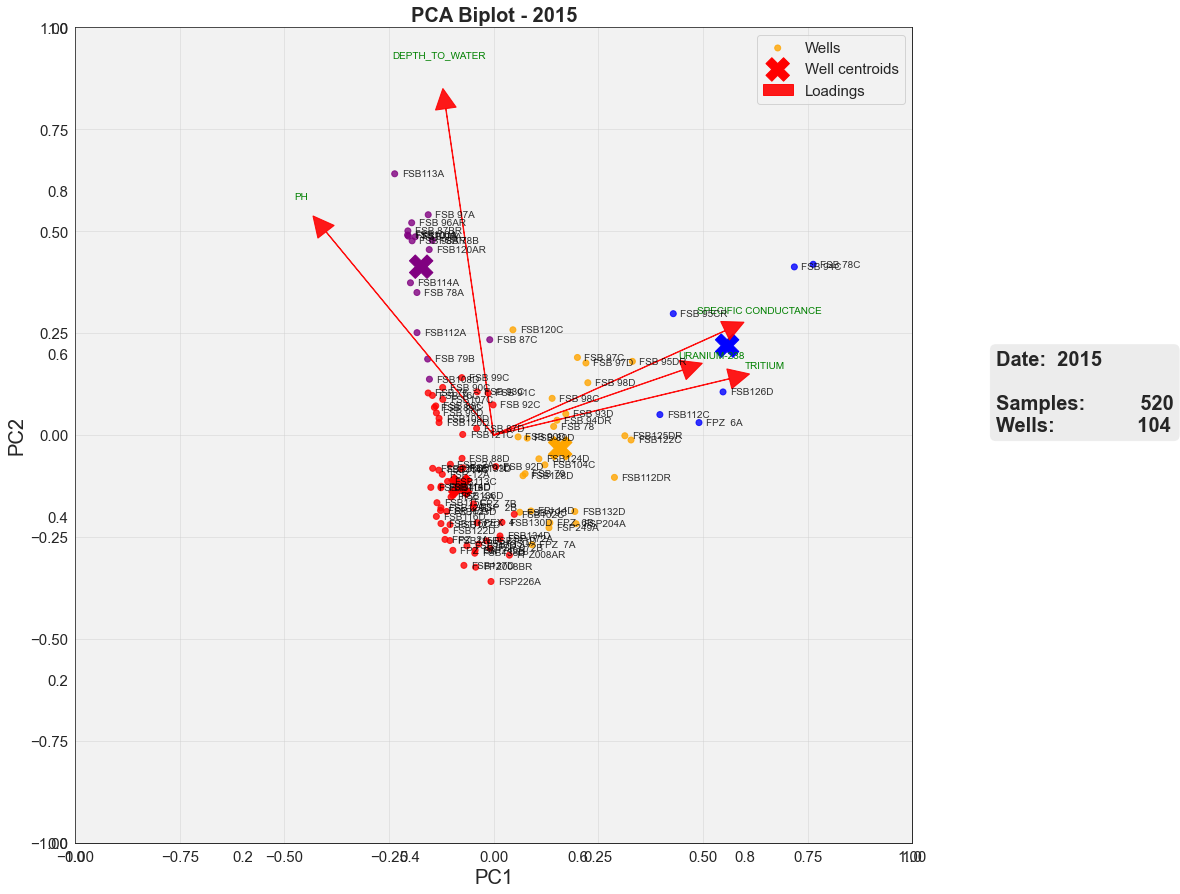

In [18]:
pylenm_df.plot_PCA_by_year(2015, analytes=analytes)

## Clustering

In [19]:
tritium = pylenm_df.interpolate_wells_by_analyte('TRITIUM', frequency='2W')
tritium = np.log10(tritium)
tritium = tritium.dropna(axis=1)
tritium

,FAS-091,FAS-092,FSB113A,FSB113C,FSB113D,FSB114C,FSB114D,FSB115C,FSB115D,FSB116C,...,FSB 88C,FSB 92C,FSB 88D,FSB 89C,FSB 89D,FSB 90C,FSB 90D,FSB 91C,FSB 91D,FSP249B
2002-12-08,2.442409,2.594370,1.993302,1.595075,2.810878,0.443920,0.524787,0.773549,0.753364,0.874275,...,3.145675,3.065711,3.179308,2.147290,2.861863,2.472391,3.084693,2.617371,3.543351,2.836930
2002-12-22,2.442409,2.594370,1.953661,1.591948,2.799402,0.438073,0.512563,0.770535,0.750288,0.872181,...,3.139085,3.067431,3.174294,2.168966,2.896594,2.465324,3.100708,2.646217,3.541925,2.783829
2003-01-05,2.442409,2.594370,1.910036,1.588797,2.787615,0.432146,0.499985,0.767500,0.747190,0.870078,...,3.132393,3.069143,3.169222,2.189612,2.928751,2.458141,3.116153,2.673266,3.540494,2.739983
2003-01-19,2.442409,2.594370,1.861534,1.585624,2.775498,0.426137,0.487032,0.764444,0.744069,0.867964,...,3.125596,3.070849,3.164090,2.209321,2.958691,2.450836,3.131067,2.698729,3.539059,2.691207
2003-02-02,2.442409,2.594370,1.806927,1.582427,2.763034,0.420043,0.473681,0.761366,0.740926,0.865840,...,3.118692,3.074719,3.158896,2.228174,2.982648,2.443407,3.132189,2.714732,3.537619,2.636251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-02,2.294466,2.452767,1.405076,1.879211,2.305351,0.080904,0.272331,0.338456,0.250420,0.396199,...,1.503116,2.510826,0.760163,1.391016,2.194692,2.037884,1.443446,2.188659,0.457377,2.152420
2015-08-16,2.294466,2.452537,1.409933,1.878522,2.305351,0.079181,0.274158,0.338456,0.250420,0.396199,...,1.502427,2.516323,0.761928,1.390935,2.201397,2.037426,1.445604,2.186108,0.469822,2.153339
2015-08-30,2.294466,2.452306,1.409933,1.878522,2.305351,0.079181,0.274158,0.338456,0.250420,0.396199,...,1.502427,2.517196,0.761928,1.390935,2.201397,2.037426,1.445604,2.186108,0.469822,2.154257
2015-09-13,2.294466,2.452075,1.409933,1.878522,2.305351,0.079181,0.274158,0.338456,0.250420,0.396199,...,1.502427,2.517196,0.761928,1.390935,2.201397,2.037426,1.445604,2.186108,0.469822,2.155126


In [20]:
elements = tritium.shape[0]
rptData = pd.DataFrame(columns=['station_id', 'ratio_repeated'])
for well in tritium.columns:
    try:
        occurance = tritium[well].duplicated().value_counts()[True]
    except KeyError:
        occurance = 0
    rptData = rptData.append({'station_id': well, 'ratio_repeated': occurance/elements}, ignore_index=True)
std_ratio = rptData.describe().T['std'].values[0]
bad_wells = rptData[rptData['ratio_repeated']>1.5*std_ratio]
bad_well_names = bad_wells.station_id.to_list()
print("Bad wells: {}\nRemaining wells: {}".format(len(bad_well_names),elements-len(bad_well_names)))
tritium = tritium.drop(bad_well_names, axis=1)

Bad wells: 44
Remaining wells: 291


(335, 112)
(136, 112)


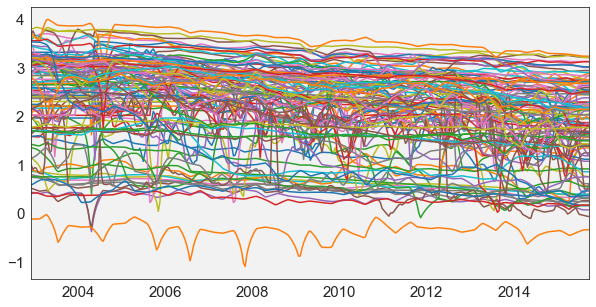

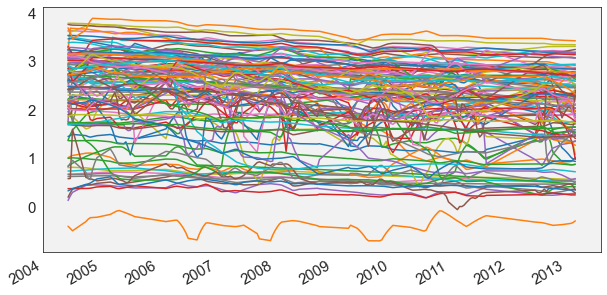

In [21]:
tritium.plot(legend=False, figsize=(10,5))
pylenm_df.remove_outliers(tritium, z_threshold=2.5).plot(legend=False, figsize=(10,5))
tritium_rm = pylenm_df.remove_outliers(tritium, z_threshold=2.5)
print(tritium.shape)
print(tritium_rm.shape)

In [22]:
pylenm_df.get_Construction_Data().head()

,FACILITY_ID,SITE_GROUP,SITE_NAME,STATION_TYPE,WELL USE,AQUIFER,WELL_USE,LATITUDE,LONGITUDE,EASTING,...,SZ_BOT(FT MSL),GROUND_ELEVATION,REFERENCE_ELEVATION_CODE,REFERENCE_ELEVATION,TOTAL_DEPTH,CONSTR_OBJ_DIAMETER,CONSTR_OBJ_MATERIAL,PUMP_TYPE,COMPLETION_DATE,DATE_SEALED
STATION_ID,,,,,,,,,,,,,,,,,,,,,
FAI001A,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.273872,-81.622904,441989.564,...,231.30,250.1,C,252.63,19.10,2.0,PVC,NONE,2016-03-22,NaT
FAI001B,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.273873,-81.622891,441990.781,...,240.60,250.2,C,252.73,9.90,2.0,PVC,NONE,2016-03-22,NaT
FAI001C,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.273874,-81.622895,441990.432,...,242.68,250.2,C,252.74,7.82,2.0,PVC,NONE,2016-03-22,NaT
FAI001D,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.273874,-81.622901,441989.928,...,246.75,250.1,C,252.56,3.65,2.0,PVC,NONE,2016-03-22,NaT
FAI002A,SRS,GSA,F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...,MONITORING WELL,Auxiliary Observation,UAZ_UTRAU,ACTIVE ECO-SENSITIVE,33.263961,-81.685462,436156.287,...,165.88,185.1,C,187.58,3.65,2.0,PVC,NONE,2016-03-29,NaT


['FSB 97D', 'FSB136D', 'FSB125DR', 'FSB 90D', 'FSP204A', 'FSB135D', 'FSB 79', 'FSP  2A', 'FOB 14D', 'FSB130D', 'FSB 88D', 'FSB123D', 'FSB 87D', 'FSB134D', 'FSB116D', 'FPZ008AR', 'FSB129D', 'FOB 13D', 'FSB112DR', 'FPZ  6B', 'FSP249B', 'FSB122D', 'FSB 98D', 'FSB108D', 'FSB133D', 'FSB 94DR', 'FSP-072A', 'FSB 95DR', 'FSB115D', 'FSB109D', 'FSB 89D', 'FBI 14D', 'FSP  2B', 'FPZ  2A', 'FPZ  7B', 'FSB132D', 'FSB 92D', 'FSB127D', 'FSB 76', 'FPZ008BR', 'FEX  4', 'FPZ  7A', 'FSB 91D', 'FSB138D', 'FSB124D', 'FSB120D', 'FSP-072B', 'FSB137D', 'FSB 93D', 'FSB117D', 'FSB114D', 'FSB104D', 'FPZ  3A', 'FPZ  4A', 'FSP249A', 'FSB126D', 'FSP226A', 'FSP-12A', 'FSB 99D', 'FSB118D', 'FPZ  6A', 'FSB 78', 'FSB128D', 'FSP 47A']


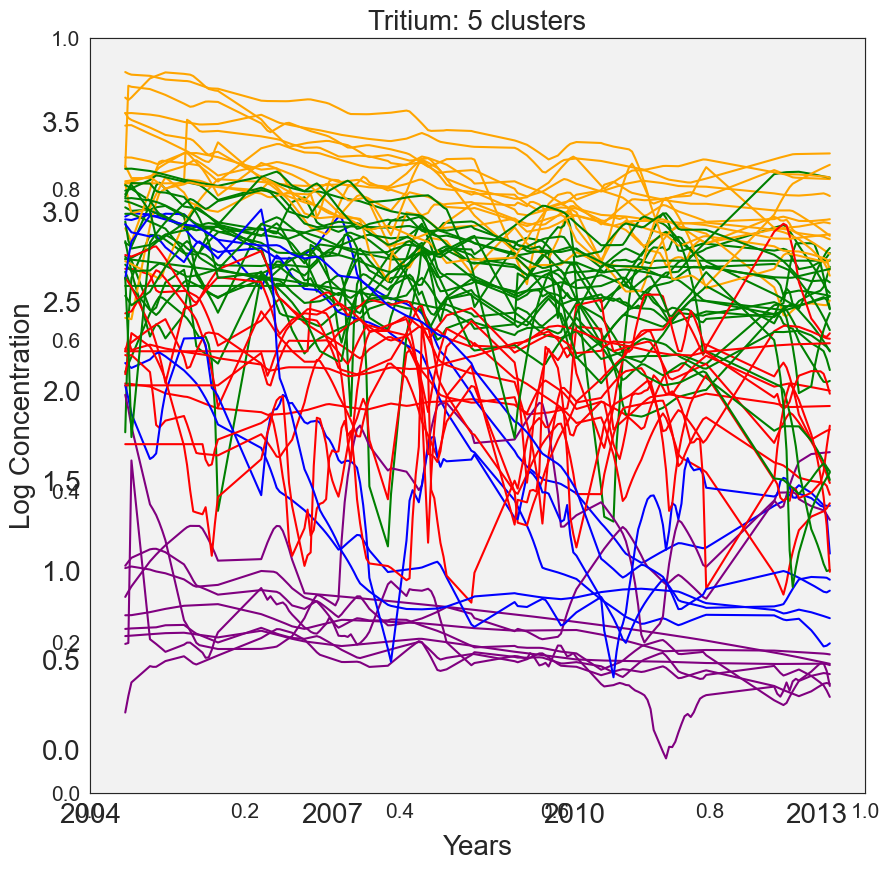

In [23]:
cluster_data = pylenm_df.cluster_data(analyte_name= 'Tritium', data = tritium_rm, n_clusters=5, year_interval=3, return_clusters=True, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], y_label = 'Log Concentration')

In [24]:
cluster_data[['STATION_ID', 'color']].head()

,STATION_ID,color
0,FBI 14D,orange
1,FEX 4,red
2,FOB 13D,green
3,FOB 14D,orange
4,FPZ 2A,purple


In [25]:
pylenm_df.plot_coordinates_to_map(cluster_data)

Map(center=[33.271459, -81.675873], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…